In [11]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

#Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [12]:
data=pd.read_csv('Chicago_Crime_Detective.csv',dtype='unicode',index_col=0,parse_dates=['Date'])
data
# file, sep = ',', parse_dates= [col],encoding='utf-8-sig', usecols= ['Date', 'ids'],) 
data.dtypes

ID                             object
Date                   datetime64[ns]
LocationDescription            object
Arrest                         object
Domestic                       object
Beat                           object
District                       object
CommunityArea                  object
Year                           object
dtype: object

In [13]:
df= data
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012


In [14]:
# df['Dates'] = pd.to_datetime(data['Date']).dt.date
df['Date'] = pd.to_datetime(df['Date'].dt.date,format="%Y-%m-%d")
df['month']=df['Date'].dt.month_name()
dayOfWeek={0:1, 1:2, 2:3, 3:4, 4:5, 5:6, 6:7}
df['WeekDay'] = df['Date'].dt.dayofweek.map(dayOfWeek)

In [16]:
# del df['Day']

In [17]:
df.isnull().sum()   #finds the total count of the null values in all the columns

ID                         0
Date                       0
LocationDescription        0
Arrest                     0
Domestic                   0
Beat                       0
District               43052
CommunityArea          24603
Year                       0
month                      0
WeekDay                    0
dtype: int64

In [18]:
df.head(20)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,WeekDay
0,8951354,2012-12-31,STREET,False,False,623,6,69,2012,December,1
1,8951141,2012-12-31,STREET,False,False,1213,12,24,2012,December,1
2,8952745,2012-12-31,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,December,1
3,8952223,2012-12-31,STREET,False,False,724,7,67,2012,December,1
4,8951608,2012-12-31,STREET,False,False,211,2,35,2012,December,1
5,8950793,2012-12-31,STREET,True,False,2521,25,19,2012,December,1
6,8950760,2012-12-31,STREET,False,False,423,4,48,2012,December,1
7,8951611,2012-12-31,STREET,False,False,231,2,40,2012,December,1
8,8951802,2012-12-31,STREET,True,False,1021,10,29,2012,December,1
9,8950706,2012-12-31,STREET,False,False,1215,12,24,2012,December,1


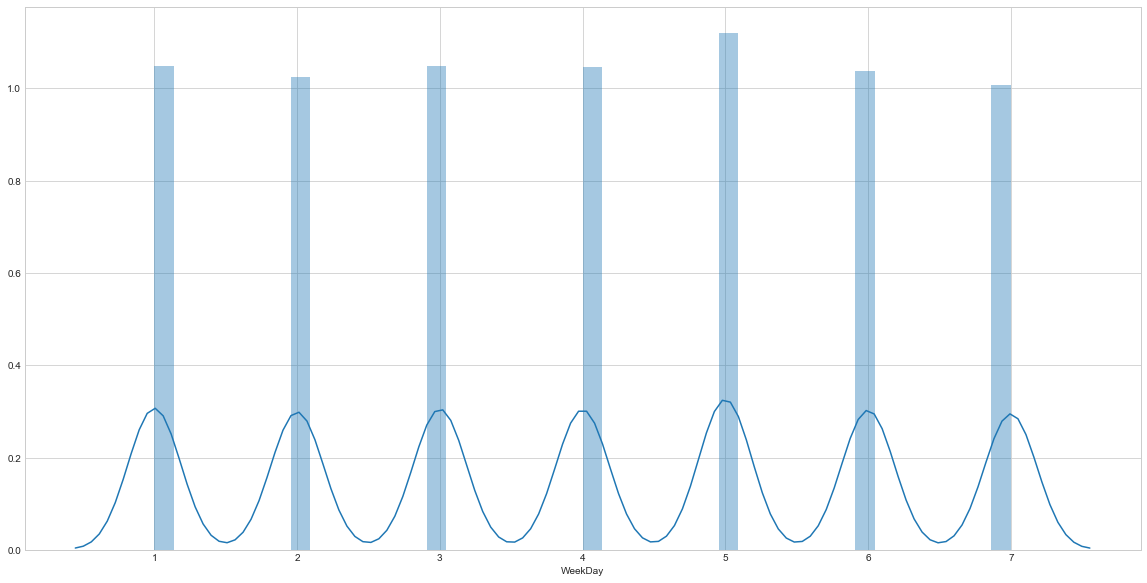

In [19]:
plt.figure(figsize=(20,10))
sns.distplot(df.WeekDay)

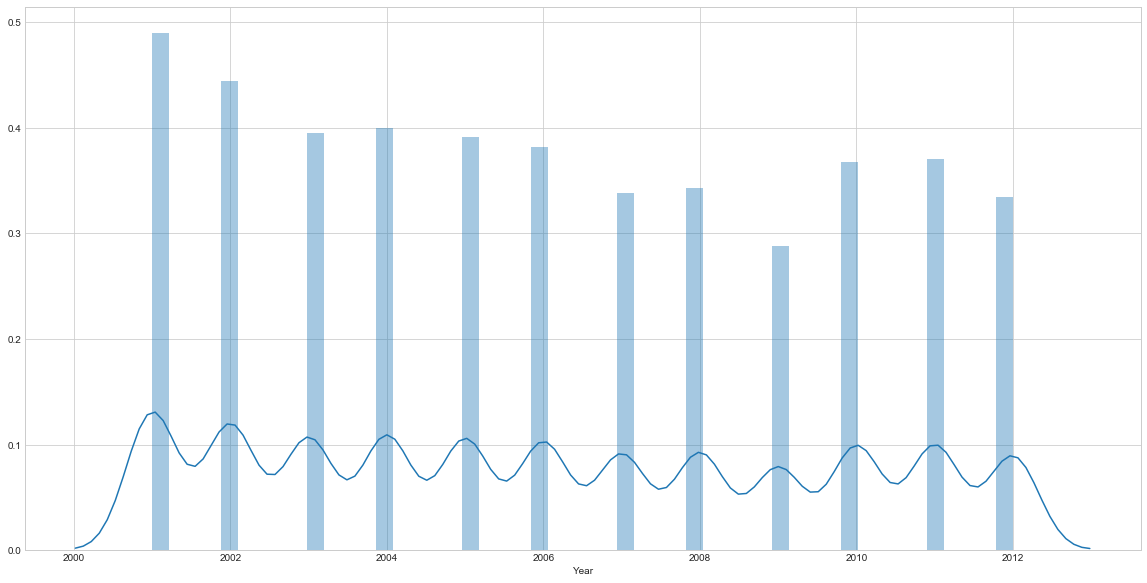

In [20]:
plt.figure(figsize=(20,10))
sns.distplot(df.Year)


In [21]:
# df.month = df.month.str.upper().map(%d)
df['month']=pd.to_datetime(df.Date, format='%b').dt.month
df['arrest'] = df['Arrest'].replace({'True':1, 'False': 0})  #converts true to 1 and false to 0 in arrest column

df.head(50)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,WeekDay,arrest
0,8951354,2012-12-31,STREET,False,False,623,6,69,2012,12,1,0
1,8951141,2012-12-31,STREET,False,False,1213,12,24,2012,12,1,0
2,8952745,2012-12-31,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,1,0
3,8952223,2012-12-31,STREET,False,False,724,7,67,2012,12,1,0
4,8951608,2012-12-31,STREET,False,False,211,2,35,2012,12,1,0
5,8950793,2012-12-31,STREET,True,False,2521,25,19,2012,12,1,1
6,8950760,2012-12-31,STREET,False,False,423,4,48,2012,12,1,0
7,8951611,2012-12-31,STREET,False,False,231,2,40,2012,12,1,0
8,8951802,2012-12-31,STREET,True,False,1021,10,29,2012,12,1,1
9,8950706,2012-12-31,STREET,False,False,1215,12,24,2012,12,1,0


In [22]:
del df['Arrest']


In [23]:
df.head(20)

,ID,Date,LocationDescription,Domestic,Beat,District,CommunityArea,Year,month,WeekDay,arrest
0,8951354,2012-12-31,STREET,False,623,6,69,2012,12,1,0
1,8951141,2012-12-31,STREET,False,1213,12,24,2012,12,1,0
2,8952745,2012-12-31,RESIDENTIAL YARD (FRONT/BACK),False,1622,16,11,2012,12,1,0
3,8952223,2012-12-31,STREET,False,724,7,67,2012,12,1,0
4,8951608,2012-12-31,STREET,False,211,2,35,2012,12,1,0
5,8950793,2012-12-31,STREET,False,2521,25,19,2012,12,1,1
6,8950760,2012-12-31,STREET,False,423,4,48,2012,12,1,0
7,8951611,2012-12-31,STREET,False,231,2,40,2012,12,1,0
8,8951802,2012-12-31,STREET,False,1021,10,29,2012,12,1,1
9,8950706,2012-12-31,STREET,False,1215,12,24,2012,12,1,0


In [24]:
df['Domestic'] = df['Domestic'].replace({'True':1, 'False': 0})  #converts true to 1 and false to 0 in Domestic column


In [25]:
df.head(20)

,ID,Date,LocationDescription,Domestic,Beat,District,CommunityArea,Year,month,WeekDay,arrest
0,8951354,2012-12-31,STREET,0,623,6,69,2012,12,1,0
1,8951141,2012-12-31,STREET,0,1213,12,24,2012,12,1,0
2,8952745,2012-12-31,RESIDENTIAL YARD (FRONT/BACK),0,1622,16,11,2012,12,1,0
3,8952223,2012-12-31,STREET,0,724,7,67,2012,12,1,0
4,8951608,2012-12-31,STREET,0,211,2,35,2012,12,1,0
5,8950793,2012-12-31,STREET,0,2521,25,19,2012,12,1,1
6,8950760,2012-12-31,STREET,0,423,4,48,2012,12,1,0
7,8951611,2012-12-31,STREET,0,231,2,40,2012,12,1,0
8,8951802,2012-12-31,STREET,0,1021,10,29,2012,12,1,1
9,8950706,2012-12-31,STREET,0,1215,12,24,2012,12,1,0


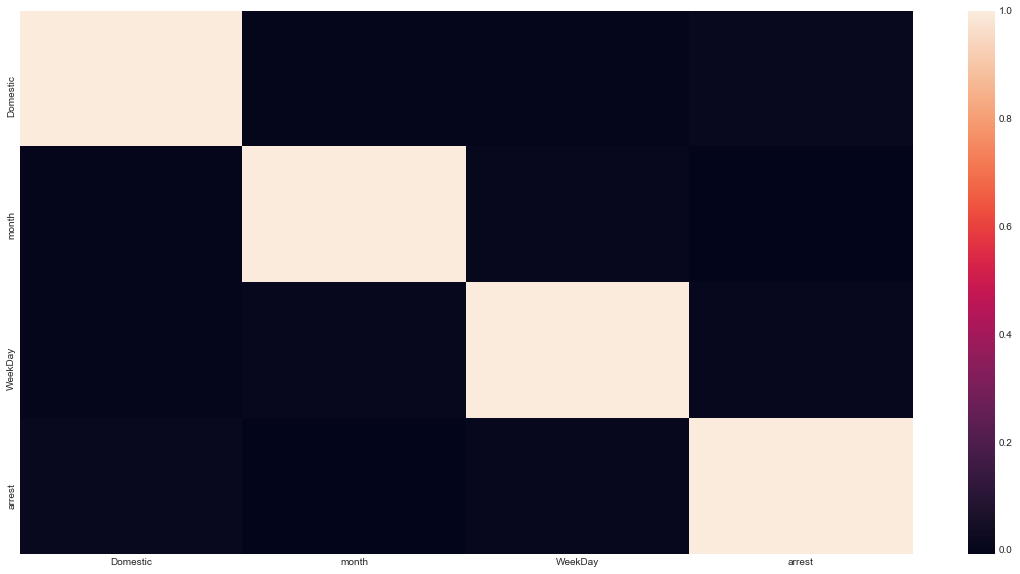

In [26]:
plt.figure(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr)

In [28]:
df['month'].value_counts()

10    17086
7     16801
8     16572
12    16426
11    16063
9     16060
1     16047
5     16035
6     16002
3     15758
4     15280
2     13511
Name: month, dtype: int64

In [29]:
plt.figure(figsize=(20,10))
df.groupby(['month','arrest'])['ID'].count()


month  arrest
1      0         14612
       1          1435
2      0         12273
       1          1238
3      0         14460
       1          1298
4      0         14028
       1          1252
5      0         14848
       1          1187
6      0         14772
       1          1230
7      0         15477
       1          1324
8      0         15243
       1          1329
9      0         14812
       1          1248
10     0         15744
       1          1342
11     0         14807
       1          1256
12     0         15029
       1          1397
Name: ID, dtype: int64

<Figure size 1440x720 with 0 Axes>

In [199]:
theft=df['month'].value_counts()
theftdict = theft.to_dict()
theftdict

{10: 17086,
 7: 16801,
 8: 16572,
 12: 16426,
 11: 16063,
 9: 16060,
 1: 16047,
 5: 16035,
 6: 16002,
 3: 15758,
 4: 15280,
 2: 13511}

In [215]:
df['arrest'].count()
dict(sorted(theftdict.items()))

{1: 16047,
 2: 13511,
 3: 15758,
 4: 15280,
 5: 16035,
 6: 16002,
 7: 16801,
 8: 16572,
 9: 16060,
 10: 17086,
 11: 16063,
 12: 16426}

TypeError: __init__() got an unexpected keyword argument 'figure'

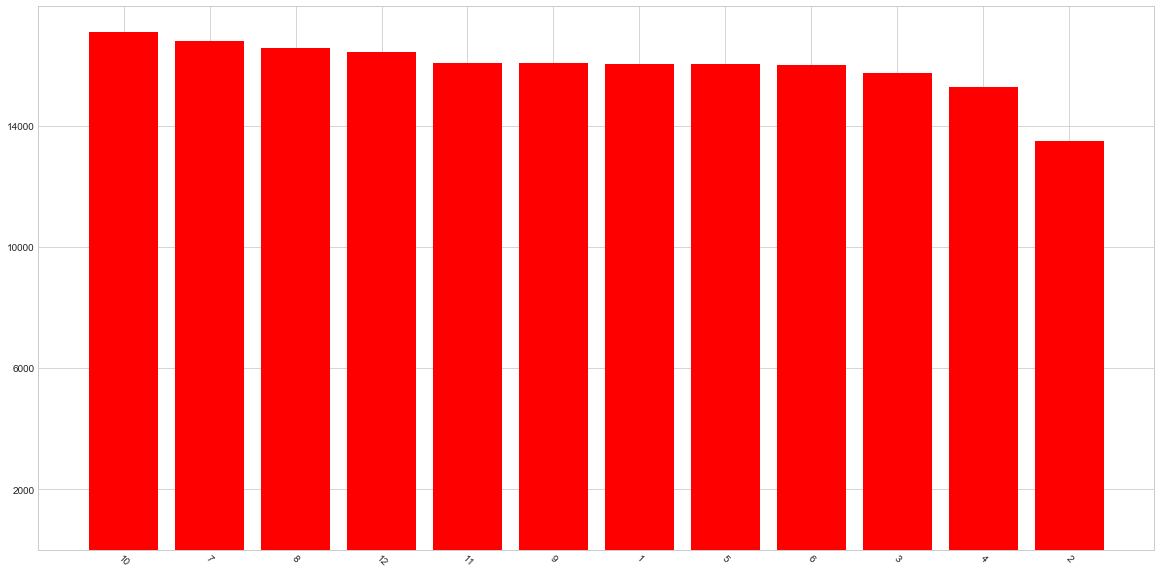

In [223]:
plt.figure(figsize=(20,10))
plt.bar(range(len(theftdict)), list(theftdict.values()), align='center',color='r')
plt.xticks(range(len(theftdict)), list(theftdict.keys()) ,rotation=-45)
plt.yticks(np.arange(2000, 18000,4000))
figure(num=None,figure=(80,6),dpi=80,facecolor='g',edgecolor='r')

In [ ]:
# df['Date'].sort_values().quantile(0.5)
df['Date'].astype('datetime64[ns]').quantile(.5)

In [ ]:
data.head()

In [ ]:
data.groupby(['month','Arrest'])['ID'].count()

In [ ]:
# df['Weekday'] = df['Date'].dt.day_name()
# df
data['Weekday'] = data['Date'].dt.day_name()
# data
df.head()

In [ ]:
plt.figure(figsize=(20,10))
df.plot.bar(x="WeekDay", y="month", color='blue')

In [31]:
df.groupby(['Year', 'arrest']).agg('count')

ID   Date  LocationDescription  Domestic   Beat  District  \
Year arrest                                                                 
2001 0       18517  18517                18517     18517  18517       119   
     1        2152   2152                 2152      2152   2152         3   
2002 0       16638  16638                16638     16638  16638       471   
     1        2115   2115                 2115      2115   2115        23   
2003 0       14859  14859                14859     14859  14859     11562   
     1        1798   1798                 1798      1798   1798      1415   
2004 0       15169  15169                15169     15169  15169     15133   
     1        1693   1693                 1693      1693   1693      1691   
2005 0       14956  14956                14956     14956  14956     14880   
     1        1528   1528                 1528      1528   1528      1523   
2006 0       14796  14796                14796     14796  14796     14768   
     1        1302   1302                 1302      1302   1302      1301   
2007 0       13068  13068                13068     13068  13068     13059   
     1        1212   1212                 1212      1212   1212      1212   
2008 0       13425  13425                13425     13425  13425     13267   
     1        1020   1020                 1020      1020   1020      1013   
2009 0       11327  11327                11327     11327  11327     11207   
     1         840    840                  840       840    840       833   
2010 0       14796  14796                14796     14796  14796     14784   
     1         701    701                  701       701    701       700   
2011 0       15012  15012                15012     15012  15012     14997   
     1         625    625                  625       625    625       625   
2012 0       13542  13542                13542     13542  13542     13456   
     1         550    550                  550       550    550       547   

             CommunityArea  month  WeekDay  
Year arrest                                 
2001 0                 550  18517    18517  
     1                  36   2152     2152  
2002 0               12730  16638    16638  
     1                1506   2115     2115  
2003 0               14859  14859    14859  
     1                1798   1798     1798  
2004 0               15168  15169    15169  
     1                1693   1693     1693  
2005 0               14956  14956    14956  
     1                1528   1528     1528  
2006 0               14795  14796    14796  
     1                1302   1302     1302  
2007 0               13068  13068    13068  
     1                1212   1212     1212  
2008 0               13425  13425    13425  
     1                1020   1020     1020  
2009 0               11327  11327    11327  
     1                 839    840      840  
2010 0               14796  14796    14796  
     1                 701    701      701  
2011 0               15012  15012    15012  
     1                 625    625      625  
2012 0               13542  13542    13542  
     1                 550    550      550

C:\Users\asus\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


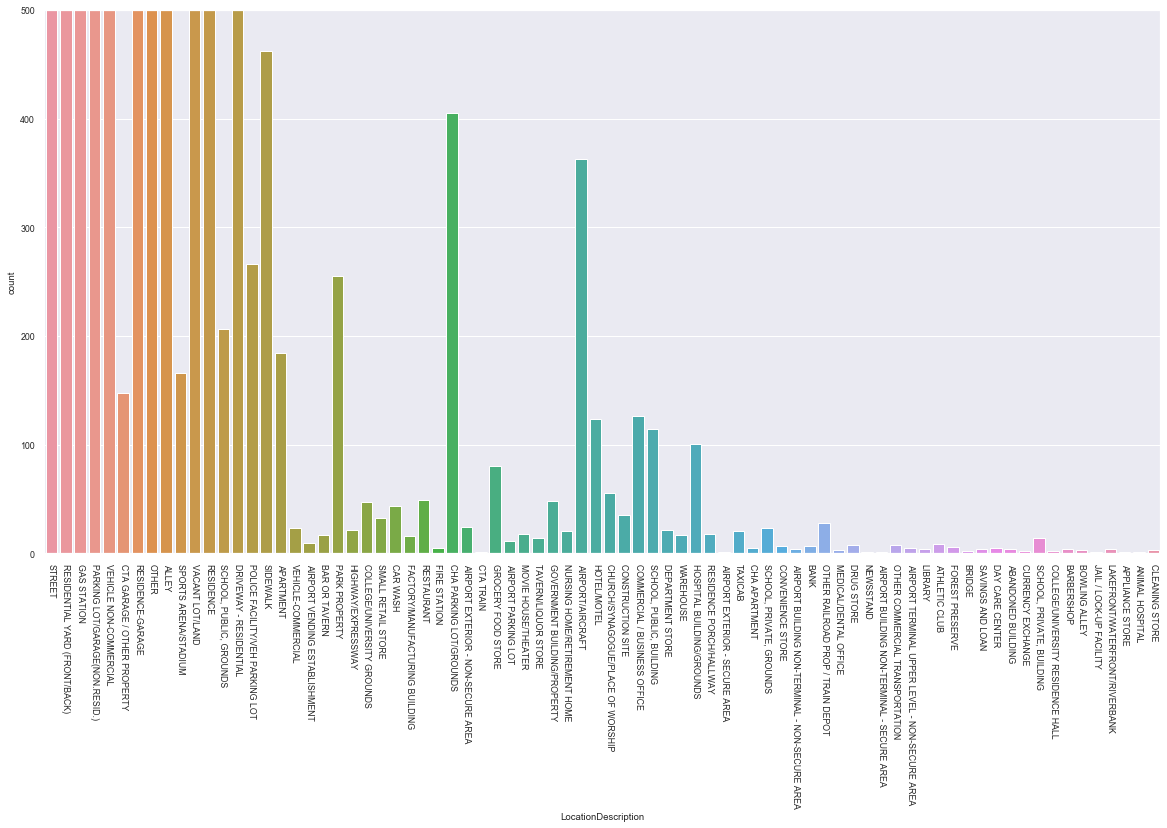

In [63]:
plt.figure(figsize=(20,10))
sns.countplot(x='LocationDescription', data=df)
plt.xticks(rotation=-90)
axes = plt.axes()
axes.set_ylim([0, 500])
sns.set(font_scale = 0.8)

In [ ]:
plt.figure(figsize=(20,10))
df.plot(kind='bar',x='LocationDescription',y='WeekDay')


In [62]:
plt.figure(figsize=(20,10))
df.T.plot(kind='bar')


TypeError: no numeric data to plot

<Figure size 1440x720 with 0 Axes>

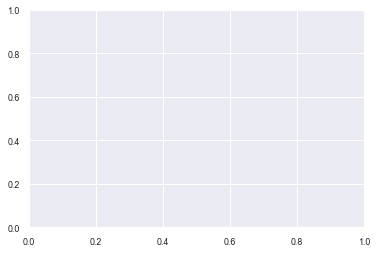